# Aim
Optimize A few small graphs varying in number of even degree nodes

Imports

In [3]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
import torch

#### Important Functions

In [4]:
def get_qaoa_params(graph, edge=None, gamma=[0.5], beta=[0.5], steps=50):
    loss_history, params_history = popt.qaoa_maxcut_torch(graph, gamma, beta,
                                                          ordering_algo='greedy',
                                                          Opt=torch.optim.RMSprop,
                                                          edge=edge,
                                                          opt_kwargs=dict(lr=0.002),
                                                          steps=steps,
                                                          pbar=False)
    best_ix = np.argmin(loss_history)
    return params_history[best_ix], loss_history[best_ix]

def get_edge_contribution(graph, edge, gamma, beta):
    sim = qtensor.QtreeSimulator()
    composer = qtensor.DefaultQAOAComposer(graph, gamma=gamma, beta=beta)
    composer.energy_expectation_lightcone(edge)
    return np.real(sim.simulate_batch(composer.circuit)[0])

def opt_runs(G, seeds = 20, steps = 200):
  """
  Doing multiple optimization runs, each with random initialized param
  Returning results which inlclude the optimal param and corresponding energies
  """

  #first do 20 optimization runs 
  s = 0
  g_results = []

  while s<seeds:
    print('seed #' + str(s))
    #initialize param
    gamma = [np.random.rand()]
    beta = [np.random.rand() ]
    initial_energy = QAOA_energy(G,gamma =  gamma, beta = beta)

    #optimization
    params, loss = get_qaoa_params(G, gamma=gamma, beta=beta,edge = None, steps=steps)
    #print('Finished get_qaoa_params')
    gamma_opt, beta_opt = params[0], params[1]
    opt_energy = QAOA_energy(G, gamma = gamma_opt, beta = beta_opt)

    result = np.asarray([float(gamma_opt), float(beta_opt), float(opt_energy), float(initial_energy)])
    g_results.append(result)
    s+=1

  
  return g_results

#### Import New Graphs

In [15]:
file3 = open("SmallRandomGraphs.txt")


In [16]:
data = []
for num in file3:
    data.append(float(num))

In [17]:
len(data)

1810

In [19]:
graph_total_nodes = [2,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10]

In [21]:
mat_list = []
c = 0
i = 0

while c< len(data):
    n = int(graph_total_nodes[i])
    n_sq = int(n**2)
    arr = np.reshape(data[c:c+n_sq], newshape = (n,n))
    mat_list.append(arr)
    
    c+= n_sq
    i+=1
    

In [23]:


def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list

g_list = mats_to_graphs(mat_list)

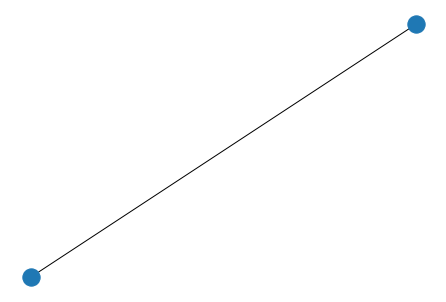

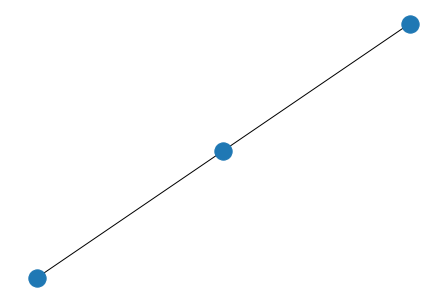

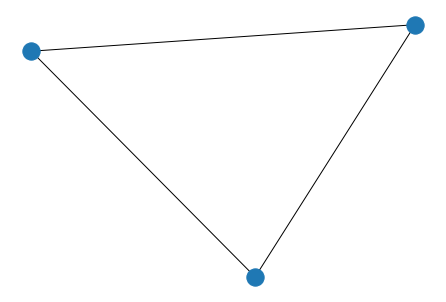

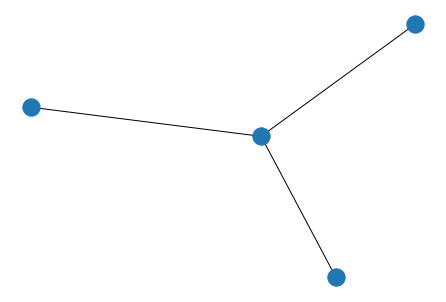

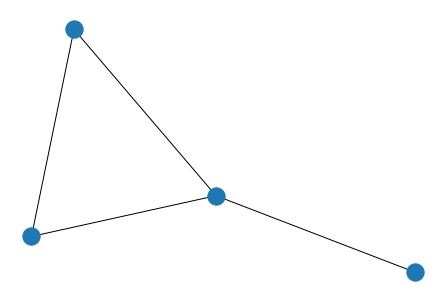

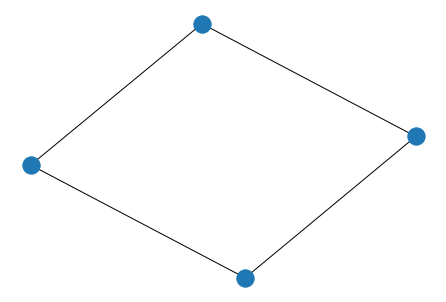

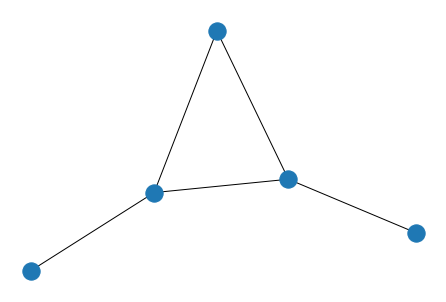

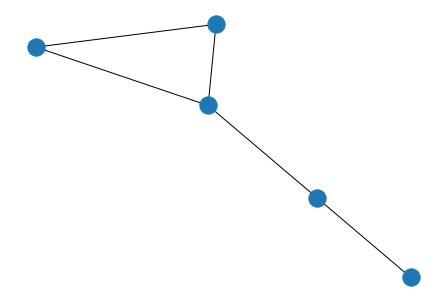

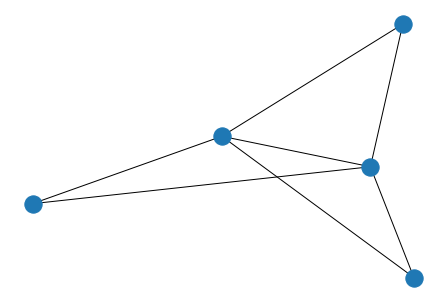

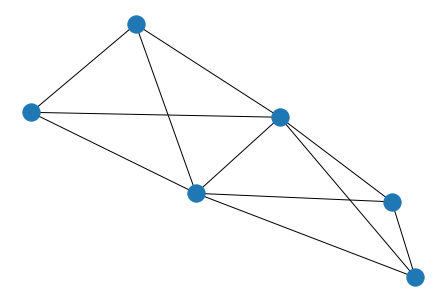

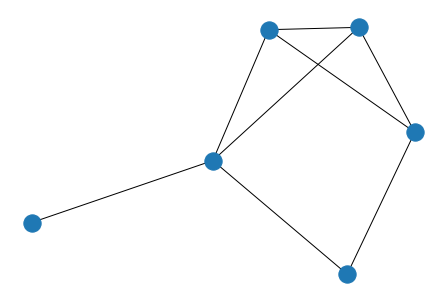

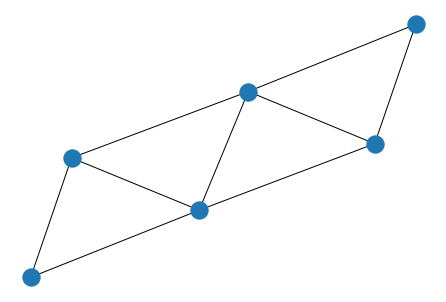

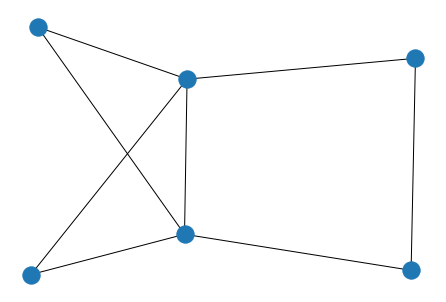

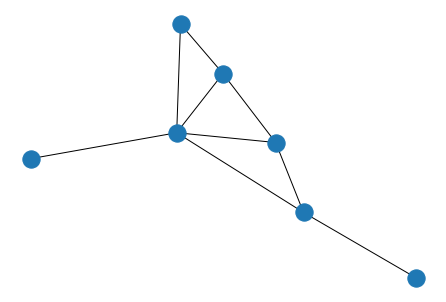

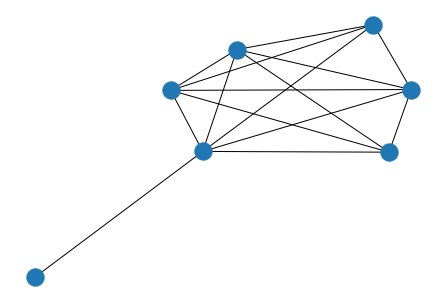

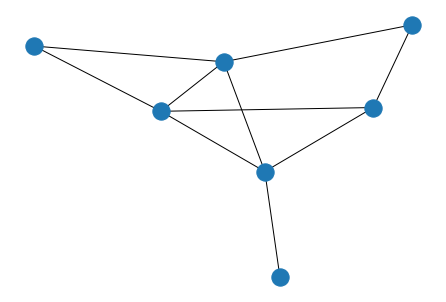

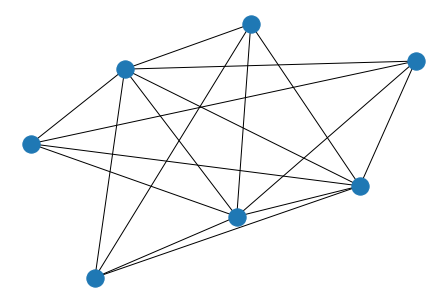

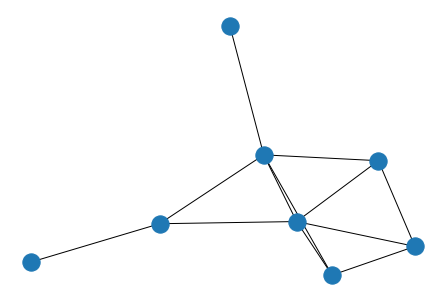

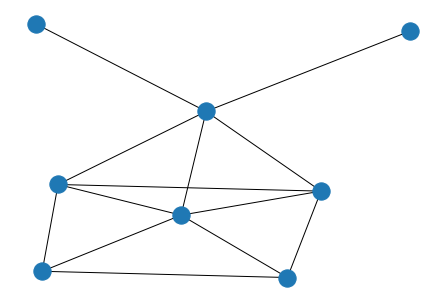

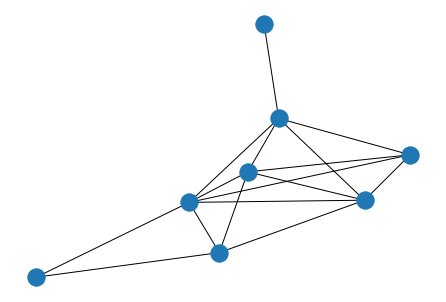

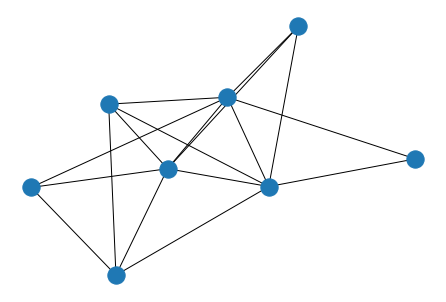

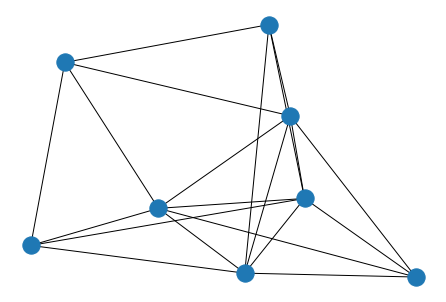

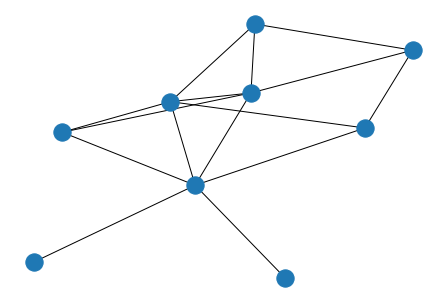

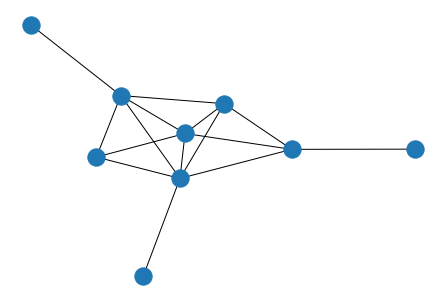

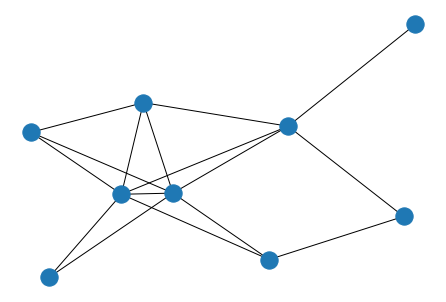

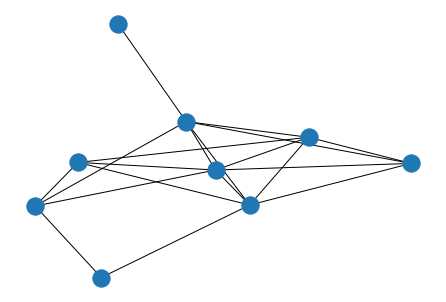

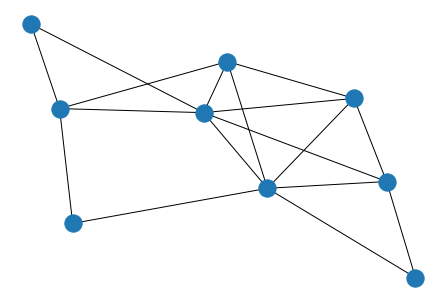

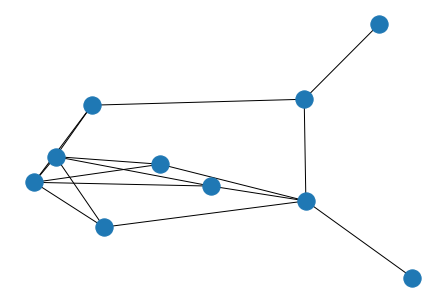

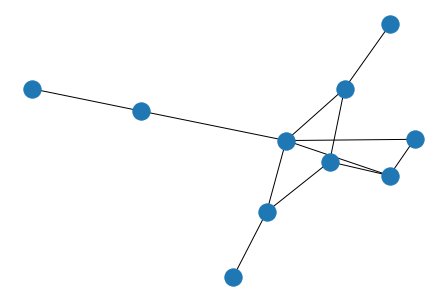

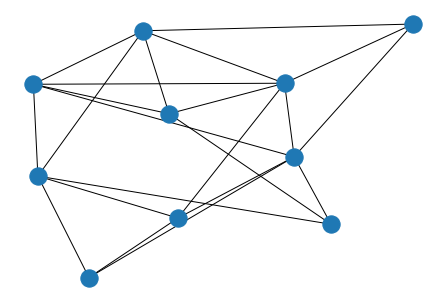

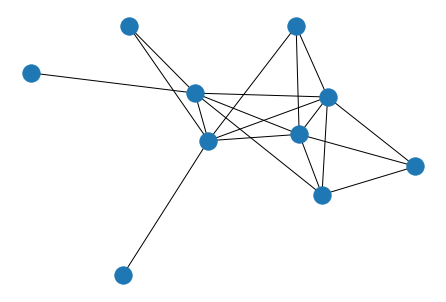

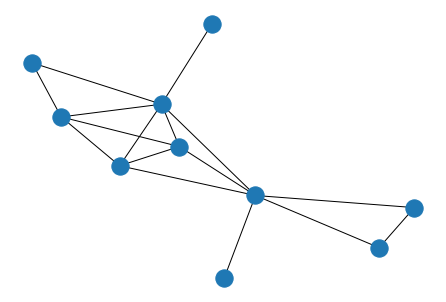

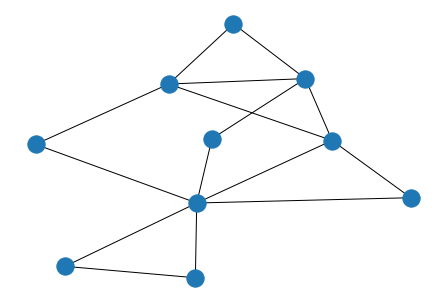

In [24]:
for g in g_list:
    nx.draw(g)
    plt.show()

In [25]:
len(g_list)

33

# Optimize Graphs

In [26]:
results = []
for g_idx in range(len(g_list)):
    print(g_idx)
    result = opt_runs(g_list[g_idx], seeds = 20, steps= 200)
    print(result)
    results.append(result)

0
seed #0



tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.25003105, 0.875     , 0.99999996, 0.47010904]), array([0.7499615 , 0.12499997, 0.99999995, 0.44197632]), array([0.74994129, 0.625     , 0.99999993, 0.97437587]), array([0.74999321, 0.12499999, 0.99999997, 0.48571486]), array([0.25001693, 0.87500006, 0.99999996, 0.88025553]), array([0.25      , 0.37501794, 0.99999995, 0.77412659]), array([0.74995875, 0.62499899, 0.99999995, 0.04045479]), array([0.74999523, 0.62499964, 0.99999997, 0.04167577]), array([0.24998701, 0.87498885, 0.99999996, 0.68563517]), array([1.2499578 , 0.87499994, 0.99999995, 0.41288793]), array([ 0.24994683, -0.12499771,  0.99999994,  0.32064042]), array([0.74999762, 0.12499999, 0.99999997, 0.3067393 ]), array([0.74996108, 0.12499999, 0.99999995, 0.56219447]), array([0.74997944, 1.12499988, 0.99999996, 0.46251999]), array([0.75      , 0.12500431, 0.99999997, 0.08604427]), array([0.74999666, 0.62500018, 0.99999997, 0.28290919]), array([0.75001967, 0.12499999, 0.99999996, 0.64784164]), array([0.24996109, 0.3749


tw 2
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.83329213, 0.12500039, 1.64951894, 0.93649436]), array([0.50188226, 0.76156926, 0.99999994, 0.99437038]), array([0.16682424, 0.3740508 , 1.64947214, 0.99973811]), array([0.83328742, 0.62580627, 1.64948559, 1.02559471]), array([0.50018704, 0.98491305, 1.        , 0.9999997 ]), array([0.83242446, 0.12503196, 1.64949778, 1.12022799]), array([0.83331454, 0.625     , 1.64951898, 1.02045636]), array([0.83320767, 0.62488264, 1.64951787, 1.02299305]), array([ 0.16670437, -0.12499974,  1.64951895,  0.76422786]), array([0.83333284, 1.12499988, 1.64951899, 0.86022534]), array([1.16664326, 0.875     , 1.64951897, 0.74809712]), array([ 0.16663533, -0.12499999,  1.64951896,  0.6022528 ]), array([0.83328569, 0.12499999, 1.64951893, 1.00231546]), array([-0.16662487,  0.12499998,  1.64951894,  0.83038945]), array([0.83329451, 0.12499999, 1.64951895, 1.17800429]), array([0.16670425, 0.87500006, 1.64951895, 1.27687899]), array([0.83328241, 0.625     , 1.64951892, 0.88526304]), array([0.83294761


tw 3
tw 3
tw 3



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([ 0.59797436, -0.09791604,  1.99999986,  0.61557215]), array([0.59793901, 0.90200722, 1.99999987, 1.72703596]), array([-0.09793283,  0.59796554,  1.99999991,  1.25370686]), array([0.5979526 , 0.40207329, 1.99999989, 1.85317631]), array([ 0.59796876, -0.09792808,  1.9999999 ,  1.26014715]), array([0.0979741 , 0.40205136, 1.99999993, 1.72637295]), array([0.59795696, 0.40204358, 1.99999994, 1.48497607]), array([0.40205562, 0.09798069, 1.99999991, 1.80002154]), array([0.09795695, 0.40204358, 1.99999994, 0.64458362]), array([0.90203089, 0.59794492, 1.99999993, 0.58483468]), array([0.90201658, 0.59794027, 1.9999999 , 0.83897519]), array([0.59797561, 0.90205514, 1.99999992, 0.75304357]), array([0.59799999, 0.90207779, 1.99999982, 0.37247965]), array([0.90204161, 0.59795481, 1.99999994, 1.67535087]), array([0.09794296, 0.90201622, 1.9999999 , 1.43418174]), array([0.59797084, 0.40208045, 1.99999987, 1.14314701]), array([0.59795821, 0.90204448, 1.99999994, 0.30233681]), array([0.90202743


tw 2
tw 2
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.8479566 , 0.625     , 2.31649646, 2.27734219]), array([-0.15204088,  0.12499999,  2.31649646,  1.34499367]), array([0.34795663, 0.37499994, 2.31649646, 2.12526911]), array([0.34795663, 0.87500387, 2.31649645, 1.59148545]), array([ 0.34807739, -0.12499865,  2.3164961 ,  1.31189819]), array([0.15204336, 0.37501433, 2.31649644, 1.4193734 ]), array([ 0.15204336, -0.1249988 ,  2.31649646,  1.19209775]), array([0.15204334, 0.87499934, 2.31649646, 0.68913234]), array([0.65204322, 0.12503102, 2.31649639, 0.93010974]), array([0.6520434 , 0.12499999, 2.31649646, 1.71531599]), array([0.65202504, 0.625     , 2.31649645, 2.20054727]), array([0.8479566 , 0.62497002, 2.3164964 , 1.88613981]), array([0.15200298, 0.37499991, 2.31649642, 1.48536662]), array([0.3479569 , 0.375     , 2.31649646, 1.87910484]), array([0.1520431 , 0.87499994, 2.31649646, 2.24354616]), array([0.84869379, 0.12494677, 2.31648306, 1.64809955]), array([0.65202743, 0.62499946, 2.31649645, 2.31526306]), array([-0.1520429


tw 3
tw 3
tw 3
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.61948377, 0.8131659 , 2.1305252 , 2.0018344 ]), array([0.89608675, 0.10482787, 2.71349528, 0.97964942]), array([0.10390835, 0.8951571 , 2.71349526, 1.49116189]), array([0.61948937, 0.31318098, 2.1305252 , 2.02802681]), array([0.61949384, 0.81318712, 2.1305252 , 1.88733287]), array([0.38050997, 0.68681979, 2.1305252 , 2.00067462]), array([0.38051248, 0.68675625, 2.13052517, 1.95583985]), array([ 0.10395427, -0.10481102,  2.71349517,  1.62630119]), array([0.89608604, 0.60482728, 2.71349528, 2.67423216]), array([0.8960911 , 0.60483015, 2.71349528, 0.96926671]), array([0.10392435, 0.89518118, 2.71349527, 1.78009842]), array([0.61948764, 0.31320235, 2.13052519, 2.11249821]), array([0.38030156, 0.18680112, 2.1305238 , 2.01335981]), array([0.38085145, 0.6891036 , 2.13049599, 0.92049969]), array([0.37983745, 1.18670666, 2.13051064, 1.98939446]), array([0.89608741, 0.10483052, 2.71349528, 1.44128882]), array([0.89608645, 0.10482723, 2.71349528, 2.22243657]), array([1.10391247, 0.8951


tw 2
tw 2
tw 2
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([-0.12499845,  0.625     ,  2.99999984,  1.69497041]), array([0.625     , 0.37497056, 2.99999978, 2.01056531]), array([0.87497705, 0.12499615, 2.9999998 , 1.95301292]), array([0.87483519, 0.62524647, 2.9999929 , 2.4233825 ]), array([0.37500003, 0.62499899, 2.99999984, 1.84909483]), array([0.12500001, 0.37495336, 2.99999967, 1.06928913]), array([0.12500167, 0.87443757, 2.99997487, 2.02001878]), array([0.62500191, 0.375     , 2.99999984, 2.01860979]), array([0.375     , 0.62501484, 2.99999983, 1.50209097]), array([0.87499994, 1.12496221, 2.99999973, 1.20798516]), array([0.625     , 0.37501839, 2.99999982, 1.90264562]), array([0.12501535, 0.875     , 2.99999983, 1.71939632]), array([0.62499964, 0.375     , 2.99999984, 2.27800422]), array([0.37498656, 0.6249997 , 2.99999983, 2.48639817]), array([0.12461689, 0.37500167, 2.99998826, 2.13694567]), array([0.12502952, 0.87500006, 2.99999978, 1.32001961]), array([0.37499923, 0.62500489, 2.99999984, 2.02066175]), array([0.12499994, 0.8750


tw 3
tw 3
tw 2
tw 3
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.62732995, 1.13955891, 3.25862791, 2.38640976]), array([0.3726669 , 0.86043185, 3.25862791, 2.61777049]), array([1.10919404, 0.88997501, 3.43572043, 2.04646896]), array([0.37275919, 0.36043829, 3.25862753, 2.6040009 ]), array([0.62733966, 0.63958097, 3.2586279 , 2.18599495]), array([0.89080119, 0.6100179 , 3.43572043, 3.08599862]), array([0.37266868, 0.36043379, 3.25862791, 3.0506465 ]), array([0.10926622, 0.88997453, 3.4357201 , 2.69738335]), array([0.37266749, 0.86043161, 3.25862791, 2.42406064]), array([ 0.37266868, -0.13956273,  3.25862791,  2.21995289]), array([0.10919483, 0.3899639 , 3.43572042, 2.69420326]), array([0.89080155, 0.61001742, 3.43572043, 2.49746123]), array([0.10919335, 0.88995379, 3.43572039, 1.93501618]), array([0.89080197, 0.61001635, 3.43572043, 3.064711  ]), array([0.10919844, 0.88998246, 3.43572043, 2.63478669]), array([0.62731749, 0.63956195, 3.2586279 , 1.99377703]), array([0.10918886, 0.38994318, 3.43572034, 1.2802055 ]), array([0.62732989, 0.6395


tw 3
tw 3
tw 3
tw 2
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.37484992, 0.63820368, 2.86415635, 2.7771492 ]), array([0.37487653, 1.1382345 , 2.86415642, 2.42934095]), array([0.10805168, 0.39180928, 3.44999177, 3.30946633]), array([0.62509435, 0.86176074, 2.8641564 , 2.38370389]), array([0.89256853, 0.10817324, 3.44995943, 2.50108746]), array([0.89195263, 0.10820101, 3.44999176, 2.0514339 ]), array([0.62511593, 0.36176497, 2.86415642, 1.16691665]), array([0.37488791, 0.13828225, 2.86415637, 2.60023982]), array([0.10802252, 0.39180335, 3.4499917 , 3.11934712]), array([0.10804942, 0.39180484, 3.44999177, 2.87718816]), array([0.8919493 , 0.60819113, 3.44999177, 1.68893714]), array([0.10804704, 0.3917549 , 3.44999149, 2.78295599]), array([0.62511122, 0.86176264, 2.86415642, 2.39030556]), array([0.89192486, 0.10818581, 3.44999172, 3.26760812]), array([0.37488428, 1.13823473, 2.86415642, 2.29329591]), array([0.62511283, 0.36172855, 2.86415639, 2.29609549]), array([0.37488902, 0.13829374, 2.86415634, 2.31596407]), array([0.89195162, 0.60819763


tw 3
tw 4
tw 3
tw 3
tw 3
tw 3
tw 3



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.587488  , 0.89908695, 4.46768896, 2.50750955]), array([0.91252178, 0.10091859, 4.46768894, 3.76902698]), array([0.9125073 , 0.10091183, 4.46768896, 4.15619694]), array([0.41250616, 0.60090768, 4.46768896, 3.34618013]), array([0.41248822, 0.1009075 , 4.46768892, 2.99322041]), array([0.08749607, 0.39908955, 4.46768896, 4.33140152]), array([0.41250175, 0.10091063, 4.46768896, 3.12282923]), array([0.91251701, 0.60093987, 4.46768888, 2.92967716]), array([0.08749361, 0.39909062, 4.46768896, 3.26105393]), array([0.08749767, 0.39909527, 4.46768895, 1.98878677]), array([0.9124704 , 0.60090345, 4.46768882, 2.92454271]), array([0.91250777, 0.10091366, 4.46768896, 4.10627328]), array([1.08749008, 0.89908749, 4.46768896, 2.41981695]), array([0.41252118, 0.10091572, 4.46768894, 1.94246643]), array([0.4125146 , 0.10091559, 4.46768895, 3.18403808]), array([0.58750206, 0.39909035, 4.46768895, 2.77517836]), array([ 0.58749336, -0.10090873,  4.46768896,  3.10792473]), array([-0.08746885,  0.10


tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.57334429, 0.59238023, 6.67106319, 5.29026155]), array([0.57335043, 0.59237677, 6.67106319, 5.89703117]), array([0.0733344 , 0.90761894, 6.67106317, 6.37648107]), array([0.75006312, 0.19786017, 5.49999972, 2.78020063]), array([0.24991573, 0.30717719, 5.49999957, 3.2668984 ]), array([0.42666227, 0.90762043, 6.67106318, 2.63420093]), array([0.57334244, 0.59237766, 6.67106319, 2.71937973]), array([0.07332195, 0.90757549, 6.67106285, 5.02178781]), array([0.07337349, 0.40763256, 6.67106307, 5.49405281]), array([0.92667937, 0.59242421, 6.67106284, 5.7934494 ]), array([0.07332709, 0.90758437, 6.67106296, 4.6884642 ]), array([0.24996103, 0.77751577, 5.49999983, 5.144884  ]), array([0.92663181, 0.59236169, 6.6710631 , 5.17196913]), array([0.5733456 , 1.09237754, 6.67106319, 5.49225053]), array([0.25000885, 0.01834703, 5.5       , 3.88470197]), array([0.42666999, 0.90761691, 6.67106315, 4.60923129]), array([0.57332432, 0.09239857, 6.67106308, 5.97137463]), array([0.75004536, 0.47868297


tw 2
tw 2
tw 2
tw 3
tw 3
tw 3
tw 3
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.90597045, 0.10968374, 5.28043215, 3.78271798]), array([0.09402964, 0.39031681, 5.28043215, 4.96445133]), array([0.90587497, 0.10996096, 5.28042055, 4.30577775]), array([0.60501528, 0.10165317, 4.34879506, 4.22047256]), array([0.0940333 , 0.39031771, 5.28043215, 3.56219305]), array([0.39504942, 0.89832902, 4.34879511, 3.99610058]), array([0.60493386, 0.60167003, 4.34879508, 4.28762375]), array([1.09400988, 0.89031357, 5.2804321 , 2.83519878]), array([0.39503422, 0.39833623, 4.34879512, 3.44017143]), array([ 0.39501044, -0.10161769,  4.34879505,  3.57757091]), array([0.39505333, 0.89828676, 4.34879502, 3.66024916]), array([0.90597165, 0.10969074, 5.28043215, 2.50942216]), array([0.09406887, 0.39032787, 5.28043195, 3.96589508]), array([0.90596479, 0.10966547, 5.28043211, 4.05140646]), array([0.90596992, 0.10968132, 5.28043215, 4.21409383]), array([0.0940301 , 0.39031827, 5.28043215, 4.65279799]), array([0.39502746, 0.39834774, 4.34879512, 4.07343802]), array([0.90596014, 0.1096


tw 3
tw 4
tw 4
tw 3
tw 3
tw 3
tw 3
tw 3
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.38932189, 0.16076228, 5.30513017, 5.19205659]), array([0.08478081, 0.39950198, 5.70842691, 5.5964006 ]), array([ 0.08479416, -0.10046814,  5.70842664,  4.06309074]), array([0.61069447, 0.83914852, 5.30513006, 4.38546472]), array([0.08476713, 0.89948732, 5.70842696, 4.97105359]), array([0.91523653, 0.10051609, 5.70842695, 2.16608981]), array([0.0847561 , 0.39945379, 5.70842681, 5.28117252]), array([0.38931453, 0.16079296, 5.30513021, 5.06468956]), array([-0.08475067,  0.1005167 ,  5.70842692,  3.53423713]), array([ 0.08477033, -0.10050882,  5.70842695,  3.28686054]), array([0.61069602, 0.3391372 , 5.30512999, 4.69092815]), array([0.61065918, 0.33922198, 5.30513015, 4.95317093]), array([0.61067051, 0.83921909, 5.30513019, 4.4684318 ]), array([0.38931453, 0.66078979, 5.30513021, 5.17181668]), array([0.38933349, 0.66077107, 5.30513017, 4.29740168]), array([0.91523832, 0.10051443, 5.70842695, 4.79746048]), array([1.0847733 , 0.39949727, 5.70842694, 4.25082606]), array([0.91522926


tw 3
tw 2
tw 3
tw 4
tw 3
tw 2
tw 3
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.59701073, 0.88976061, 5.30286052, 3.34445652]), array([0.59701085, 0.88975233, 5.30286053, 3.77654959]), array([0.40301567, 0.11024611, 5.30286075, 4.80445684]), array([0.09698269, 0.88974911, 5.30286076, 3.82812939]), array([0.40303716, 0.61027008, 5.30286077, 3.64964208]), array([0.90302092, 0.11025072, 5.30286078, 4.22430383]), array([0.40303239, 0.61025602, 5.30286081, 5.28981746]), array([-0.09693863,  0.11025564,  5.30286074,  2.76088619]), array([0.59695107, 0.88969237, 5.30286043, 3.53096854]), array([0.09698261, 0.88974923, 5.30286076, 2.53822907]), array([0.4030377 , 0.11025306, 5.30286081, 4.62912488]), array([0.09695787, 0.38974699, 5.30286081, 3.43872431]), array([0.09695951, 0.38972405, 5.30286075, 4.67563314]), array([ 0.59696549, -0.11023791,  5.30286078,  2.631465  ]), array([0.09695814, 0.88973218, 5.30286078, 4.95667207]), array([0.40303236, 1.11025167, 5.30286081, 2.18713856]), array([0.09695856, 0.38971528, 5.30286069, 4.12023797]), array([0.0969702 , 0.


tw 3
tw 3
tw 4
tw 3
tw 3
tw 3
tw 2
tw 4
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.40824139, 0.88656324, 5.57408809, 5.06681472]), array([1.09406066, 0.89334041, 5.85148501, 2.33885842]), array([0.40821606, 0.38657349, 5.57408815, 4.12307349]), array([0.4079724 , 0.38669884, 5.57408032, 4.92999361]), array([0.40820092, 0.88656473, 5.57408813, 4.91419841]), array([0.59178364, 0.61343575, 5.57408816, 4.52741722]), array([ 0.09415847, -0.10663357,  5.85148584,  2.65337077]), array([0.40821743, 0.8865537 , 5.57408815, 4.51911738]), array([0.59178495, 0.61336106, 5.5740876 , 4.32916303]), array([0.0941448 , 0.89335847, 5.85148587, 4.86657839]), array([0.5917837 , 0.11341418, 5.57408811, 4.46801509]), array([0.59178776, 0.61346698, 5.57408806, 4.08235806]), array([0.59178364, 0.61342168, 5.57408814, 4.2809561 ]), array([0.09414998, 0.89336014, 5.85148587, 4.85019974]), array([0.59178203, 0.11343587, 5.57408816, 3.40573795]), array([0.59178203, 0.61345381, 5.57408812, 3.25928684]), array([0.90586102, 0.60668695, 5.85148557, 4.62647283]), array([ 0.09416978, -0.10


tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 2
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.40794253, 0.28388286, 8.26336856, 8.01366539]), array([-0.06353483,  0.58592069,  8.78401582,  6.31263231]), array([0.71270406, 0.17568992, 7.95356335, 7.20206116]), array([0.59205157, 0.71604282, 8.26336838, 8.16742102]), array([0.06351052, 0.41401738, 8.78401513, 7.3352574 ]), array([0.71276045, 0.67509246, 7.95355401, 4.96019856]), array([0.06354541, 0.91408896, 8.78401579, 7.00485345]), array([0.93646371, 0.0859201 , 8.78401582, 7.48306687]), array([0.59201735, 0.71611547, 8.26336831, 7.59579588]), array([ 0.28663468, -0.17569369,  7.95351268,  7.49700893]), array([0.28729644, 0.32430887, 7.95356335, 7.27124732]), array([0.71270972, 0.67567283, 7.9535633 , 3.53225432]), array([0.28729805, 0.32428652, 7.9535634 , 7.27128162]), array([0.59205717, 0.71625686, 8.26336795, 7.72379199]), array([0.71269345, 0.67578375, 7.95356339, 7.05408417]), array([0.40794861, 0.28383684, 8.26336849, 7.50858301]), array([1.06351602, 0.41407105, 8.78401573, 3.65656766]), array([0.28718579, 0.


tw 3
tw 3
tw 2
tw 4
tw 3
tw 4
tw 3
tw 2
tw 2
tw 3



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.41954261, 0.61056018, 5.83124699, 5.64425956]), array([0.58044457, 0.38937789, 5.83124671, 5.03620232]), array([0.58046234, 0.88947958, 5.83124685, 5.04887347]), array([0.58044571, 0.38937575, 5.83124669, 4.37484035]), array([0.90859008, 0.60904562, 6.50663384, 4.27492035]), array([0.58045882, 0.88944858, 5.83124698, 5.11046685]), array([1.09140003, 0.89095294, 6.50663384, 4.49600444]), array([0.90859658, 0.10906275, 6.50663381, 5.84400051]), array([0.58046019, 0.88947165, 5.8312469 , 5.12032652]), array([0.58045769, 0.38943616, 5.83124699, 5.79708153]), array([0.58047676, 0.3894518 , 5.83124693, 5.21060982]), array([0.90859544, 0.60905123, 6.50663384, 5.23483844]), array([0.09139846, 0.89093536, 6.50663379, 4.03208657]), array([0.90859181, 0.60902238, 6.50663376, 4.90129236]), array([0.09141073, 0.89095402, 6.50663384, 4.64847101]), array([0.41957909, 0.610569  , 5.83124684, 4.02077944]), array([0.09140666, 0.89095372, 6.50663385, 3.89775571]), array([0.90859663, 0.10906474


tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([ 0.56142241, -0.08546837,  9.90115351,  8.02252258]), array([-0.06139605,  0.08548067,  9.90115334,  6.02395436]), array([0.43857867, 0.08546928, 9.90115351, 7.73919517]), array([0.56078982, 0.41473794, 9.90101253, 8.92718386]), array([0.06142409, 0.41453433, 9.9011535 , 4.11686774]), array([0.9386127 , 0.08554364, 9.9011524 , 6.252158  ]), array([-0.0613796 ,  0.08548889,  9.90115306,  8.18721512]), array([0.43857637, 0.58546442, 9.9011535 , 8.89716288]), array([0.43854424, 0.58543855, 9.90115315, 6.4835614 ]), array([ 7.37292647e-01, -1.17292184e-04,  8.50000166e+00,  6.29245787e+00]), array([0.43856573, 0.08544341, 9.90115338, 9.52536531]), array([0.43857765, 0.58546841, 9.90115351, 7.2848033 ]), array([0.43858725, 0.08547719, 9.90115348, 8.67489237]), array([0.56136191, 0.41447943, 9.90115243, 4.64821777]), array([0.06142256, 0.41453174, 9.90115351, 8.42574781]), array([0.43857768, 0.08546878, 9.90115351, 8.60238746]), array([0.93859661, 0.58551937, 9.90115302, 5.38789058]


tw 4
tw 3
tw 3
tw 2
tw 3
tw 4
tw 3
tw 4
tw 4
tw 3
tw 2
tw 3



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.91358626, 0.604909  , 7.61823706, 6.70204823]), array([0.58640605, 0.10491017, 7.61823707, 6.95024165]), array([0.08640292, 0.89508927, 7.61823707, 7.23378791]), array([0.5863691 , 0.10491456, 7.61823683, 5.10069688]), array([0.58643889, 0.1048989 , 7.61823689, 5.577198  ]), array([0.5864321 , 0.10489964, 7.61823695, 5.91511185]), array([0.41359085, 0.89509052, 7.61823707, 6.30997976]), array([0.58640712, 0.10490997, 7.61823707, 6.4564745 ]), array([0.08640713, 0.89508981, 7.61823707, 6.28167377]), array([ 0.08641209, -0.10488089,  7.61823692,  5.5453835 ]), array([0.41358727, 0.39509189, 7.61823706, 4.56750898]), array([0.08642695, 0.39509475, 7.618237  , 4.80060485]), array([-0.08635547,  0.10491566,  7.61823663,  5.22431995]), array([0.41359299, 0.39508879, 7.61823707, 7.17181475]), array([0.91359025, 1.10488725, 7.61823698, 5.50805204]), array([0.58640712, 0.10491003, 7.61823707, 6.27233273]), array([0.91359043, 0.60490972, 7.61823707, 6.79639389]), array([0.08643416, 0.


tw 4
tw 4
tw 3
tw 4
tw 4
tw 3
tw 4
tw 4
tw 4
tw 4
tw 3
tw 2
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.40540481, 0.86761808, 7.46488157, 5.00854576]), array([0.59454626, 0.1323908 , 7.46488179, 6.01377201]), array([0.59454936, 0.63238513, 7.46488179, 7.39367532]), array([0.59388989, 0.63237643, 7.46484047, 6.33495206]), array([0.91973513, 0.10043891, 8.07512291, 7.96679975]), array([0.59455734, 0.6323846 , 7.46488178, 7.25699488]), array([0.40547961, 0.36761439, 7.46488173, 6.48698372]), array([0.59454626, 0.63238847, 7.46488179, 6.84929208]), array([0.40545249, 0.86768323, 7.46488147, 7.00299959]), array([0.59454626, 0.13238876, 7.46488179, 7.07763973]), array([0.5945465 , 0.63237357, 7.46488178, 6.26391259]), array([0.08026091, 0.39956149, 8.07512291, 6.46671441]), array([0.59454626, 0.13238814, 7.46488179, 6.8153269 ]), array([0.91972995, 1.10043466, 8.07512289, 4.55050728]), array([0.59454471, 0.63238508, 7.46488179, 6.73493062]), array([0.40543967, 0.86759943, 7.46488176, 7.46302645]), array([0.40544042, 0.36761528, 7.46488178, 6.96779482]), array([0.59454626, 0.132385  


tw 3
tw 3
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.06891148, 0.40892482, 9.53245444, 8.30293691]), array([0.93115097, 0.09109458, 9.53245476, 8.26553594]), array([0.73912108, 1.1392107 , 8.25948777, 5.93069751]), array([ 0.06888139, -0.09105856,  9.53245466,  7.02916394]), array([0.41224656, 0.72110885, 8.3151381 , 8.00015779]), array([0.58786047, 0.27910569, 8.31513693, 7.92086576]), array([0.41225848, 0.22108071, 8.3151381 , 8.00019179]), array([0.41225675, 0.22110762, 8.31513811, 8.26111475]), array([0.2611647 , 0.35958943, 8.25950232, 7.5040088 ]), array([1.06888378, 0.90893066, 9.53245475, 5.44993559]), array([0.58772749, 0.27912056, 8.31513735, 7.99730138]), array([0.73887134, 0.64027131, 8.25950263, 7.96894773]), array([0.58774322, 0.27887937, 8.31513811, 8.05800849]), array([0.93112063, 1.09107423, 9.5324548 , 4.78394546]), array([0.58774406, 0.27889907, 8.31513811, 7.97481873]), array([0.73887134, 0.64026064, 8.25950263, 8.1848787 ]), array([0.26108152, 0.35994732, 8.25950205, 7.48743213]), array([0.26117295, 0.8595


tw 4
tw 3
tw 4
tw 4
tw 4
tw 3
tw 4
tw 4
tw 4
tw 4
tw 4
tw 3
tw 4
tw 4
tw 3
tw 4
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.27721399, 0.09337148, 8.53415648, 8.43491606]), array([0.43646228, 0.60367894, 9.6082809 , 6.95546424]), array([0.43645003, 0.60368127, 9.60828094, 7.98199024]), array([ 0.92965144,  0.09513187, 10.20938024,  8.21738876]), array([0.43643343, 0.10365808, 9.60828086, 8.54106031]), array([ 1.07034099,  0.40486625, 10.20938023,  5.86076444]), array([ 0.07035359, -0.09511713, 10.2093802 ,  7.37017333]), array([ 0.07034846,  0.9048683 , 10.20938024,  8.01853256]), array([0.56355041, 0.39632294, 9.60828094, 7.17534098]), array([ 0.07035922,  0.90487212, 10.20938021,  5.56969623]), array([0.56357616, 0.39632782, 9.60828079, 8.05182502]), array([0.27725849, 0.0932086 , 8.5341564 , 8.46103982]), array([ 0.92966759,  1.09513128, 10.20938018,  8.24913907]), array([0.43645003, 0.60367638, 9.60828094, 7.91076052]), array([0.72284096, 0.40643999, 8.53415637, 8.51911117]), array([0.43646637, 0.10376528, 9.60827998, 6.72566613]), array([0.43643081, 0.1036594 , 9.60828085, 8.53495615]), array


tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 3
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 3
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([ 0.56389135,  0.4091562 , 11.7775995 ,  5.868242  ]), array([ 0.56390858,  0.90869206, 11.77754675, 10.5065404 ]), array([ 0.06393602,  0.40917251, 11.77759866,  9.56536996]), array([ 0.9361167 ,  0.59084725, 11.77759952,  9.31366984]), array([ 0.43608722,  0.59083557, 11.77759925, 10.0373778 ]), array([ 0.43612245,  0.09086743, 11.77759943,  9.84728921]), array([ 0.43611047,  0.59084511, 11.77759951,  8.48143044]), array([ 0.06387886,  0.90925562, 11.7775969 ,  9.88213759]), array([ 0.93611324,  0.09084599, 11.77759951,  8.88058286]), array([ 0.56388515,  0.40915394, 11.77759952,  9.61836272]), array([ 0.93610126,  0.59084207, 11.77759944,  9.94441473]), array([ 0.74630886,  0.49998412, 10.        ,  9.99327332]), array([ 0.06388316,  0.90915257, 11.77759952, 11.50372031]), array([ 0.56384867,  0.90912497, 11.77759907,  7.48046474]), array([ 0.56389153, -0.09084322, 11.7775995 ,  9.91211009]), array([ 0.06382247,  0.9092465 , 11.77759545, 11.74739121]), array([ 0.56389135,  0


tw 4
tw 4
tw 2
tw 2
tw 3
tw 4
tw 3
tw 4
tw 3
tw 4
tw 3
tw 4
tw 4
tw 3
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.91867441, 0.60445881, 9.3767907 , 7.79688905]), array([0.08134218, 0.39561248, 9.37679176, 9.2931113 ]), array([0.5967021 , 0.11292896, 9.01911902, 7.00573374]), array([0.081343  , 0.39559445, 9.37679168, 9.28927159]), array([0.59670132, 0.11292922, 9.01911902, 8.57335331]), array([0.91866297, 0.60434425, 9.37679143, 8.35458624]), array([0.08133842, 0.89561445, 9.37679177, 8.01135792]), array([0.40326706, 0.38708466, 9.01911886, 7.59925003]), array([0.5967015 , 0.11293126, 9.01911902, 5.61153458]), array([0.59670061, 0.61294907, 9.01911897, 8.84184763]), array([ 0.08134221, -0.10436638,  9.3767917 ,  7.21370806]), array([0.91866803, 0.10443217, 9.37679134, 7.23636079]), array([0.0813607 , 0.89561892, 9.37679166, 7.84611512]), array([0.91862011, 0.60438615, 9.37679139, 8.10887012]), array([0.59670264, 1.1129123 , 9.01911898, 6.76644984]), array([-0.08133322,  0.10438623,  9.37679177,  4.96605769]), array([-0.08132229,  0.10438733,  9.37679172,  4.37382477]), array([0.4033055 


tw 4
tw 4
tw 4
tw 2
tw 4
tw 4
tw 4
tw 4
tw 4
tw 2
tw 4
tw 2
tw 4
tw 4
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.70964545, 0.62905174, 8.28836696, 8.10321017]), array([0.92273504, 0.59747607, 9.16035801, 8.27563911]), array([0.92274672, 0.59747165, 9.16035798, 8.50333478]), array([0.7097525 , 0.62910324, 8.28836711, 7.93670208]), array([0.29025388, 0.87095779, 8.28836735, 7.99394555]), array([0.07724008, 0.90245146, 9.16035808, 7.42266603]), array([0.07726598, 0.40252534, 9.16035799, 7.29752264]), array([0.07726192, 0.40251526, 9.16035814, 7.64552001]), array([0.92274636, 0.59747672, 9.16035806, 8.37848036]), array([0.70964837, 0.62904531, 8.28836698, 7.67178163]), array([0.70965636, 0.62899023, 8.28836686, 7.87352494]), array([0.07723852, 0.90244943, 9.16035805, 8.23599479]), array([ 0.29031771, -0.12896955,  8.28836686,  6.92137777]), array([0.29016247, 0.87096715, 8.28836718, 6.68094522]), array([0.92278743, 0.09752735, 9.16035809, 8.08380188]), array([0.29024085, 0.8709476 , 8.28836735, 6.71068766]), array([0.290353  , 0.37095502, 8.28836697, 7.39531418]), array([0.29023811, 0.3709


tw 2
tw 2
tw 3
tw 3
tw 4
tw 4
tw 3
tw 4
tw 4
tw 4
tw 3
tw 4
tw 4
tw 4
tw 4
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.07873981, 0.3981663 , 9.8756753 , 9.00691577]), array([0.07872742, 0.89816445, 9.87567533, 8.19979229]), array([0.92127252, 0.10184485, 9.87567532, 7.9633222 ]), array([0.5682227 , 0.36666688, 8.54537421, 8.35139716]), array([0.56819564, 0.36676994, 8.54537453, 7.87923755]), array([0.56822795, 0.86675858, 8.54537457, 8.27620647]), array([0.07873061, 0.39816543, 9.87567533, 5.51009422]), array([0.07872517, 0.89815032, 9.87567529, 7.03677607]), array([0.07873222, 0.39816514, 9.87567533, 7.76921695]), array([0.07874703, 0.39816874, 9.87567525, 8.5755438 ]), array([0.078732  , 0.39816496, 9.87567533, 8.03256803]), array([0.56822032, 0.8667686 , 8.54537459, 8.50407479]), array([0.43176684, 0.63324469, 8.54537455, 8.02650952]), array([0.4317781 , 0.13332216, 8.54537429, 7.96186959]), array([0.92129117, 0.10188526, 9.87567478, 6.33452052]), array([0.56875265, 0.36727676, 8.54532014, 8.04028574]), array([0.43178341, 0.63322765, 8.54537459, 7.99091454]), array([0.568268  , 0.36678445


tw 2
tw 2
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 3
tw 4
tw 2
tw 4
tw 3
tw 4
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([ 0.57169455,  0.387665  , 11.06722815,  9.43683431]), array([ 0.06974354,  0.40477729, 11.38298422,  9.36764821]), array([ 0.0697363 ,  0.40477574, 11.38298423,  9.36749812]), array([ 0.93026388,  0.5952245 , 11.38298423, 10.25817437]), array([ 0.57170129,  0.38776222, 11.06722954,  9.32864526]), array([ 0.5716995 ,  0.38773882, 11.06722946,  9.41652843]), array([ 0.93026793,  0.0952253 , 11.38298423,  9.97500972]), array([ 0.06973087,  0.90477115, 11.38298422,  6.601689  ]), array([ 0.93026316,  0.59522414, 11.38298423,  9.48199012]), array([ 0.5717063 , -0.11221142, 11.06722943,  8.89855958]), array([ 0.57166958,  0.88775986, 11.06722928, 10.11104422]), array([ 0.57168949,  0.88772088, 11.06722926, 10.4937178 ]), array([ 0.06979124,  0.40480787, 11.38298329,  9.73952323]), array([ 0.57170117,  0.88777435, 11.06722952,  9.24248138]), array([ 0.42827681,  0.11223506, 11.0672294 ,  9.71007424]), array([ 0.42830074,  0.6122613 , 11.06722946,  9.24281882]), array([ 0.93025219,  0


tw 3
tw 3
tw 3
tw 3
tw 4
tw 2
tw 3
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 2
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([ 0.92314649,  0.60027641, 10.44458016,  8.07708327]), array([ 0.07685144,  0.39970908, 10.4445802 ,  9.98173037]), array([ 0.42311037,  1.10028219, 10.44457982,  8.48693731]), array([ 0.57684851,  0.89969981, 10.44458019,  8.04714479]), array([ 0.07685391, -0.10026495, 10.44458006,  8.41513611]), array([ 0.92314953,  0.10029061, 10.44458021,  8.4791333 ]), array([ 0.42313537,  1.10028756, 10.44458015,  6.98971903]), array([ 0.07684995,  0.89970928, 10.44458021,  9.34274971]), array([ 0.57684952,  0.89970887, 10.44458021,  8.52780628]), array([ 0.92314357,  0.60028625, 10.44458019,  5.02859419]), array([ 0.57685113,  0.39967239, 10.4445799 ,  9.49426154]), array([ 0.42315027,  0.60029101, 10.44458021,  6.15217152]), array([ 0.07685027,  0.8997094 , 10.44458021,  5.33194589]), array([ 0.92315215,  0.60029995, 10.44458019,  8.78273222]), array([ 0.07684995,  0.89970899, 10.44458021,  8.75266742]), array([ 0.92314541,  0.60028958, 10.4445802 ,  7.23816138]), array([ 0.57686508,  0


tw 2
tw 3
tw 3
tw 2
tw 2
tw 2
tw 2
tw 2
tw 3
tw 3
tw 3
tw 4
tw 2
tw 3
tw 3
tw 3



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([ 0.91380852,  0.11322033, 10.34393669,  6.85049113]), array([0.25      , 0.37491301, 8.49999961, 7.46085671]), array([ 0.58619189,  0.11319412, 10.34393654,  8.5815604 ]), array([ 0.41380936,  0.88677537, 10.34393669,  9.33468128]), array([ 0.08618511,  0.88671476, 10.34393578,  7.93670457]), array([ 0.41380632,  0.38677973, 10.34393669,  8.4019715 ]), array([ 0.91385382,  0.11322545, 10.34393614,  8.63013363]), array([ 0.91429389,  0.61321759, 10.3438706 ,  8.61911281]), array([ 0.5862093 ,  0.61321402, 10.34393659,  7.20792815]), array([ 0.0861885 ,  0.38675046, 10.34393651,  7.15718072]), array([ 0.5861907 ,  0.61322045, 10.34393669,  9.810288  ]), array([ 0.91380745,  0.61321938, 10.34393669,  5.86045626]), array([ 0.41381034,  0.8867541 , 10.34393655,  9.47594078]), array([ 0.41381213,  0.38673705, 10.3439363 ,  7.00687807]), array([ 0.08619048,  0.3867797 , 10.34393669,  8.04752131]), array([ 0.41381162,  0.88677937, 10.34393669,  8.40830242]), array([ 0.58619076,  0.613


tw 3
tw 3
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 2
tw 3
tw 2
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.4018113 , 0.87073928, 7.51545963, 4.78704025]), array([0.10306226, 0.88017398, 8.23935535, 6.40644577]), array([0.40181041, 0.37075782, 7.51545968, 4.58106948]), array([0.89693117, 0.11965511, 8.23934966, 6.93655657]), array([0.59818751, 0.12924369, 7.51545968, 5.18167924]), array([0.89692062, 0.11982745, 8.23935528, 4.42161063]), array([0.10309727, 0.88017297, 8.23935508, 7.47612514]), array([1.10303843, 0.88016993, 8.23935527, 5.61739127]), array([0.59817737, 0.62923855, 7.51545966, 5.86248979]), array([0.40180635, 0.37075967, 7.51545967, 7.2038627 ]), array([ 0.40181395, -0.12921582,  7.51545961,  5.73051565]), array([1.10305023, 0.38024595, 8.23935428, 5.90904629]), array([0.40181252, 0.87077552, 7.51545965, 6.80217167]), array([0.89694059, 0.11982869, 8.23935536, 7.61488295]), array([1.1030519 , 0.380171  , 8.23935534, 5.55264134]), array([0.89694059, 0.11982992, 8.23935535, 5.05530384]), array([0.5981831 , 0.62919062, 7.5154594 , 4.84032223]), array([1.1030556 , 0.8801


tw 4
tw 4
tw 3
tw 3
tw 2
tw 3
tw 3
tw 4
tw 3
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 2
tw 4
tw 3
tw 3
tw 3
tw 3
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([ 0.38900405,  0.35743132, 11.73973741, 11.46842524]), array([ 0.61095452,  0.64257091, 11.73973749, 11.60936473]), array([ 0.07301939,  0.89577579, 13.52481286, 12.14881032]), array([ 0.61096603,  0.64259565, 11.73973748, 10.6679819 ]), array([ 0.38903064, -0.14252526, 11.73973741, 10.998714  ]), array([ 0.07301908,  0.89562798, 13.52481739, 11.53316316]), array([ 0.6109671 ,  0.64256245, 11.73973751, 10.58103787]), array([ 0.07302198,  0.89564133, 13.52481746,  9.46808623]), array([ 0.92697376,  0.10435483, 13.52481746, 11.39834335]), array([ 0.2500757 ,  0.20272583, 10.99999961, 10.66602123]), array([ 0.61098135,  0.64257705, 11.73973748, 10.94164539]), array([ 0.75004756,  0.98013467, 10.99999995, 10.38179527]), array([ 0.92697841,  0.10435486, 13.52481746, 12.36924217]), array([ 0.07302155,  0.89564502, 13.52481746, 11.15076734]), array([ 0.25000012,  0.54667145, 11.        , 10.99477141]), array([ 0.2500321 ,  0.08521897, 10.99999991, 10.94358928]), array([ 0.38903403,  0


tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 4
tw 3
tw 3
tw 4
tw 2
tw 2
tw 4



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([ 0.92778772,  0.59661984, 11.4506423 ,  8.07951173]), array([ 0.07220539,  0.90336525, 11.45064224,  8.82961345]), array([ 0.07221439,  0.40337768, 11.4506423 , 10.60574123]), array([ 0.44130498,  0.60644376, 10.55666603,  9.3921691 ]), array([ 0.07221711,  0.40339017, 11.45064227,  9.75517332]), array([ 0.44127917,  0.60649776, 10.55666582,  8.84185389]), array([ 0.92778772,  0.09662024, 11.4506423 , 11.43163016]), array([ 0.07221164,  0.40337878, 11.4506423 , 10.71542143]), array([ 1.07219458,  0.40337536, 11.45064222,  5.58358509]), array([ 0.55877751,  0.39358404, 10.55666564,  9.71200809]), array([ 0.07224014,  0.40339574, 11.45064207,  7.55255828]), array([ 0.07227791,  0.90337759, 11.45064116, 10.03730825]), array([ 0.92780799,  0.59667772, 11.45064149,  9.21230769]), array([ 0.92778701,  0.09661496, 11.45064229,  9.73901849]), array([ 0.9277876 ,  0.09662259, 11.4506423 , 10.94707314]), array([ 0.07222105,  0.90338141, 11.45064228,  9.67227089]), array([ 0.07222294,  0


tw 3
tw 3
tw 3
tw 4
tw 4
tw 4
tw 4
tw 3
tw 4
tw 4
tw 3
tw 4
tw 4
tw 2
tw 4
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([ 0.07971632, -0.1001961 ,  9.88827549,  7.1001839 ]), array([ 0.07971045, -0.10019181,  9.88827549,  6.79429073]), array([0.4312425 , 0.09766677, 9.46349274, 6.92457183]), array([0.9202894 , 1.10018432, 9.88827546, 7.02078596]), array([0.4313207 , 0.59769487, 9.46349322, 7.32754995]), array([ 0.0797139 , -0.10017561,  9.88827539,  5.25992484]), array([0.07970819, 0.39980081, 9.8882755 , 8.42919368]), array([0.07972833, 0.39980462, 9.88827542, 7.69395944]), array([0.43129393, 0.59768671, 9.46349339, 7.91373514]), array([0.92029065, 0.60019791, 9.8882755 , 7.30061406]), array([0.92027575, 0.10019561, 9.88827545, 5.08261785]), array([0.56869644, 0.40227473, 9.46349315, 7.13826036]), array([0.56871152, 0.90231502, 9.46349338, 8.53463313]), array([0.43129528, 0.59768844, 9.46349339, 8.66318531]), array([-0.07971947,  0.60017639,  9.88827538,  6.56819146]), array([0.07970943, 0.89980739, 9.88827549, 9.13915621]), array([0.43129396, 0.59768593, 9.46349339, 7.50585709]), array([0.4312


tw 4
tw 3
tw 3
tw 2
tw 3
tw 3
tw 2
tw 3
tw 3
tw 3
tw 3
tw 3
tw 2
tw 3
tw 2



seed #1



seed #2



seed #3



seed #4



seed #5



seed #6



seed #7



seed #8



seed #9



seed #10



seed #11



seed #12



seed #13



seed #14



seed #15



seed #16



seed #17



seed #18



seed #19



[array([0.41175583, 0.11021198, 9.71142152, 7.22156679]), array([0.08824743, 0.38974223, 9.71142204, 7.37847295]), array([0.91176748, 0.61028928, 9.7114219 , 6.8805322 ]), array([0.91175693, 0.61022663, 9.71142179, 7.33217145]), array([0.91176885, 0.1103062 , 9.71142164, 9.20493065]), array([0.5882386 , 0.38973743, 9.71142206, 4.56088126]), array([-0.08823824,  0.11026218,  9.71142206,  7.11099272]), array([ 0.58824027, -0.11025072,  9.71142203,  5.67873269]), array([0.91175848, 1.11024261, 9.71142198, 6.17737903]), array([0.08823869, 0.8897441 , 9.71142205, 7.6786268 ]), array([0.58824027, 0.88973874, 9.71142206, 7.44133369]), array([0.41176429, 0.11025894, 9.71142205, 9.66377133]), array([0.58823925, 0.8897413 , 9.71142205, 7.62429692]), array([0.41176665, 0.11030368, 9.71142169, 5.15795594]), array([0.08823881, 0.38973811, 9.71142206, 6.81986403]), array([0.41184977, 0.11026055, 9.71142018, 7.74653599]), array([0.91175371, 1.11023164, 9.71142185, 7.28576991]), array([0.41175437, 0.

In [27]:
a_file = open("SmallRandomGraphsData.txt", "w")
for result in results:
    for row in result:
        np.savetxt(a_file, row)
a_file.close()